In [1]:
import ROOT
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1I, TH1F, TH2F, TH3F, TColor, TEfficiency
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import numpy as np
import pdb
from array import array

Welcome to JupyROOT 6.26/06


In [2]:
%cd /sphenix/u/egm2153/spring_2023
gROOT.LoadMacro("sPhenixStyle.C");
gROOT.ProcessLine("SetsPhenixStyle()")

/direct/sphenix+u/egm2153/spring_2023


0

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [3]:
%cd /sphenix/user/egm2153/calib_study/detdeta/analysis/runs23727_23746

/gpfs/mnt/gpfs02/sphenix/user/egm2153/calib_study/detdeta/analysis/runs23727_23746


In [68]:
#runs = ['23727','23735','23737','23738','23739','23740','23743','23745']
cent = '50-60'
lowbound = {'0-5': 400, '5-10':300, '10-20':200, '20-30':100, '30-40':80, '40-50':60, '50-60':30}
highbound = {'0-5': 1300, '5-10':1200, '10-20':900, '20-30':700, '30-40':450, '40-50':350, '50-60':150}
starmean = {'0-5': 620, '5-10':515, '10-20':402, '20-30':279, '30-40':187, '40-50':118, '50-60':70}
phenixmean = {'0-5': 599, '5-10':498.7, '10-20':367.8, '20-30':248.5, '30-40':162.7, '40-50':101.1, '50-60':58.6}
staruncert = {'0-5': 33, '5-10':28, '10-20':21, '20-30':15, '30-40':10, '40-50':6, '50-60':4}
phenixuncert = {'0-5': 24.7, '5-10':28.9, '10-20':23.1, '20-30':17.5, '30-40':13.5, '40-50':9.8, '50-60':7.4}

f1 = ROOT.TFile.Open("MC/dETdeta_analysis_allruns_hijing_run14_nozs_mc_reweight_"+cent+"_reweight_hijing.root")
h_eT_truth = TH1F(f1.Get("hetdeta_ihcalbin"))
h_eT_truth_ihcalbin = TH1F(f1.Get("hetdeta_ihcalbin"))
h_eT_truth_ohcalbin = TH1F(f1.Get("hetdeta_ohcalbin"))
h_eT_truth_calobin = TH1F(f1.Get("hetdeta_calobin"))
h_eT_sim_emcal = TH1F(f1.Get("h_eT_emcal"))
h_eT_sim_ihcal = TH1F(f1.Get("h_eT_ihcal"))
h_eT_sim_ohcal = TH1F(f1.Get("h_eT_ohcal"))
h_eT_sim_calo = TH1F(f1.Get("h_eT_calo"))
h_eT_truth.SetDirectory(0)
h_eT_truth_ihcalbin.SetDirectory(0)
h_eT_truth_ohcalbin.SetDirectory(0)
h_eT_truth_calobin.SetDirectory(0)
h_eT_sim_emcal.SetDirectory(0)
h_eT_sim_ihcal.SetDirectory(0)
h_eT_sim_ohcal.SetDirectory(0)
h_eT_sim_calo.SetDirectory(0)
f1.Close()
f2 = ROOT.TFile.Open("new_cent_bins/dETdeta_analysis_allruns_HCal_zs_30ADC_EMCal_zs_40ADC_data_noweight_"+cent+".root")
h_eT_data_emcal = TH1F(f2.Get("h_eT_emcal"))
h_eT_data_ihcal = TH1F(f2.Get("h_eT_ihcal"))
h_eT_data_ohcal = TH1F(f2.Get("h_eT_ohcal"))
h_eT_data_calo = TH1F(f2.Get("h_eT_calo"))
h_eT_data_emcal.SetDirectory(0)
h_eT_data_ihcal.SetDirectory(0)
h_eT_data_ohcal.SetDirectory(0)
h_eT_data_calo.SetDirectory(0)
f2.Close()
f3 = ROOT.TFile.Open("MC/dETdeta_analysis_allruns_run14_nozs_mc_reweight_"+cent+"_reweight_epos.root")
h_eT_truth_epos = TH1F(f3.Get("hetdeta_ihcalbin"))
h_eT_truth_ihcalbin_epos = TH1F(f3.Get("hetdeta_ihcalbin"))
h_eT_truth_ohcalbin_epos = TH1F(f3.Get("hetdeta_ohcalbin"))
h_eT_truth_calobin_epos = TH1F(f3.Get("hetdeta_calobin"))
h_eT_epos_emcal = TH1F(f3.Get("h_eT_emcal"))
h_eT_epos_ihcal = TH1F(f3.Get("h_eT_ihcal"))
h_eT_epos_ohcal = TH1F(f3.Get("h_eT_ohcal"))
h_eT_epos_calo = TH1F(f3.Get("h_eT_calo"))
h_eT_truth_epos.SetDirectory(0)
h_eT_truth_ihcalbin_epos.SetDirectory(0)
h_eT_truth_ohcalbin_epos.SetDirectory(0)
h_eT_truth_calobin_epos.SetDirectory(0)
h_eT_epos_emcal.SetDirectory(0)
h_eT_epos_ihcal.SetDirectory(0)
h_eT_epos_ohcal.SetDirectory(0)
h_eT_epos_calo.SetDirectory(0)
f3.Close()
f4 = ROOT.TFile.Open("MC/dETdeta_analysis_allruns_run14_nozs_mc_reweight_"+cent+"_reweight_ampt.root")
h_eT_truth_ampt = TH1F(f4.Get("hetdeta_ihcalbin"))
h_eT_truth_ihcalbin_ampt = TH1F(f4.Get("hetdeta_ihcalbin"))
h_eT_truth_ohcalbin_ampt = TH1F(f4.Get("hetdeta_ohcalbin"))
h_eT_truth_calobin_ampt = TH1F(f4.Get("hetdeta_calobin"))
h_eT_ampt_emcal = TH1F(f4.Get("h_eT_emcal"))
h_eT_ampt_ihcal = TH1F(f4.Get("h_eT_ihcal"))
h_eT_ampt_ohcal = TH1F(f4.Get("h_eT_ohcal"))
h_eT_ampt_calo = TH1F(f4.Get("h_eT_calo"))
h_eT_truth_ampt.SetDirectory(0)
h_eT_truth_ihcalbin_ampt.SetDirectory(0)
h_eT_truth_ohcalbin_ampt.SetDirectory(0)
h_eT_truth_calobin_ampt.SetDirectory(0)
h_eT_ampt_emcal.SetDirectory(0)
h_eT_ampt_ihcal.SetDirectory(0)
h_eT_ampt_ohcal.SetDirectory(0)
h_eT_ampt_calo.SetDirectory(0)
f4.Close()
f5 = ROOT.TFile.Open("dETdeta_total_variation_"+cent+".root")
emcal_unc = TH1F(f5.Get("emcal_detdeta_dev"))
ihcal_unc = TH1F(f5.Get("ihcal_detdeta_dev"))
ohcal_unc = TH1F(f5.Get("ohcal_detdeta_dev"))
calo_unc = TH1F(f5.Get("calo_detdeta_dev"))
emcal_unc.SetDirectory(0)
ihcal_unc.SetDirectory(0)
ohcal_unc.SetDirectory(0)
calo_unc.SetDirectory(0)
f5.Close()

In [69]:
h_eT_data_hcal = TH1F(h_eT_data_ihcal.Clone("h_eT_data_hcal"))
for i in range(1, h_eT_data_hcal.GetNbinsX() + 1):
    h_eT_data_hcal.SetBinContent(i, h_eT_data_ihcal.GetBinContent(i) + h_eT_data_ohcal.GetBinContent(i))
    h_eT_data_hcal.SetBinError(i, np.sqrt(h_eT_data_ihcal.GetBinError(i)**2 + h_eT_data_ohcal.GetBinError(i)**2))

h_eT_sim_hcal = TH1F(h_eT_sim_ihcal.Clone("h_eT_sim_hcal"))
for i in range(1, h_eT_sim_hcal.GetNbinsX() + 1):
    h_eT_sim_hcal.SetBinContent(i, h_eT_sim_ihcal.GetBinContent(i) + h_eT_sim_ohcal.GetBinContent(i))
    h_eT_sim_hcal.SetBinError(i, np.sqrt(h_eT_sim_ihcal.GetBinError(i)**2 + h_eT_sim_ohcal.GetBinError(i)**2))

h_eT_epos_hcal = TH1F(h_eT_epos_ihcal.Clone("h_eT_epos_hcal"))
for i in range(1, h_eT_epos_hcal.GetNbinsX() + 1):
    h_eT_epos_hcal.SetBinContent(i, h_eT_epos_ihcal.GetBinContent(i) + h_eT_epos_ohcal.GetBinContent(i))
    h_eT_epos_hcal.SetBinError(i, np.sqrt(h_eT_epos_ihcal.GetBinError(i)**2 + h_eT_epos_ohcal.GetBinError(i)**2))

h_eT_ampt_hcal = TH1F(h_eT_ampt_ihcal.Clone("h_eT_ampt_hcal"))
for i in range(1, h_eT_ampt_hcal.GetNbinsX() + 1):
    h_eT_ampt_hcal.SetBinContent(i, h_eT_ampt_ihcal.GetBinContent(i) + h_eT_ampt_ohcal.GetBinContent(i))
    h_eT_ampt_hcal.SetBinError(i, np.sqrt(h_eT_ampt_ihcal.GetBinError(i)**2 + h_eT_ampt_ohcal.GetBinError(i)**2))

In [70]:
emcal_ratio_hijing = TH1F(h_eT_sim_emcal.Clone("emcal_ratio_hijing"))
emcal_ratio_hijing.Divide(h_eT_truth)
emcal_detdeta_hijing = TH1F(h_eT_data_emcal.Clone("emcal_detdeta_hijing"))
emcal_detdeta_hijing.Divide(emcal_ratio_hijing)
emcal_ratio_epos = TH1F(h_eT_epos_emcal.Clone("emcal_ratio_epos"))
emcal_ratio_epos.Divide(h_eT_truth_epos)
emcal_detdeta_epos = TH1F(h_eT_data_emcal.Clone("emcal_detdeta_epos"))
emcal_detdeta_epos.Divide(emcal_ratio_epos)
emcal_ratio_ampt = TH1F(h_eT_ampt_emcal.Clone("emcal_ratio_ampt"))
emcal_ratio_ampt.Divide(h_eT_truth_ampt)
emcal_detdeta_ampt = TH1F(h_eT_data_emcal.Clone("emcal_detdeta_ampt"))
emcal_detdeta_ampt.Divide(emcal_ratio_ampt)

ihcal_ratio_hijing = TH1F(h_eT_sim_ihcal.Clone("ihcal_ratio_hijing"))
ihcal_ratio_hijing.Divide(h_eT_truth_ihcalbin)
ihcal_detdeta_hijing = TH1F(h_eT_data_ihcal.Clone("ihcal_detdeta_hijing"))
ihcal_detdeta_hijing.Divide(ihcal_ratio_hijing)
ihcal_ratio_epos = TH1F(h_eT_epos_ihcal.Clone("ihcal_ratio_epos"))
ihcal_ratio_epos.Divide(h_eT_truth_ihcalbin_epos)
ihcal_detdeta_epos = TH1F(h_eT_data_ihcal.Clone("ihcal_detdeta_epos"))
ihcal_detdeta_epos.Divide(ihcal_ratio_epos)
ihcal_ratio_ampt = TH1F(h_eT_ampt_ihcal.Clone("ihcal_ratio_ampt"))
ihcal_ratio_ampt.Divide(h_eT_truth_ihcalbin_ampt)
ihcal_detdeta_ampt = TH1F(h_eT_data_ihcal.Clone("ihcal_detdeta_ampt"))
ihcal_detdeta_ampt.Divide(ihcal_ratio_ampt)

hcal_ratio_hijing = TH1F(h_eT_sim_hcal.Clone("hcal_ratio_hijing"))
hcal_ratio_hijing.Divide(h_eT_truth_ihcalbin)
hcal_detdeta_hijing = TH1F(h_eT_data_hcal.Clone("hcal_detdeta_hijing"))
hcal_detdeta_hijing.Divide(hcal_ratio_hijing)
hcal_ratio_epos = TH1F(h_eT_epos_hcal.Clone("hcal_ratio_epos"))
hcal_ratio_epos.Divide(h_eT_truth_ihcalbin_epos)
hcal_detdeta_epos = TH1F(h_eT_data_hcal.Clone("hcal_detdeta_epos"))
hcal_detdeta_epos.Divide(hcal_ratio_epos)
hcal_ratio_ampt = TH1F(h_eT_ampt_hcal.Clone("hcal_ratio_ampt"))
hcal_ratio_ampt.Divide(h_eT_truth_ihcalbin_ampt)
hcal_detdeta_ampt = TH1F(h_eT_data_hcal.Clone("hcal_detdeta_ampt"))
hcal_detdeta_ampt.Divide(hcal_ratio_ampt)

ohcal_ratio_hijing = TH1F(h_eT_sim_ohcal.Clone("ohcal_ratio_hijing"))
ohcal_ratio_hijing.Divide(h_eT_truth_ohcalbin)
ohcal_detdeta_hijing = TH1F(h_eT_data_ohcal.Clone("ohcal_detdeta_hijing"))
ohcal_detdeta_hijing.Divide(ohcal_ratio_hijing)
ohcal_ratio_epos = TH1F(h_eT_epos_ohcal.Clone("ohcal_ratio_epos"))
ohcal_ratio_epos.Divide(h_eT_truth_ohcalbin_epos)
ohcal_detdeta_epos = TH1F(h_eT_data_ohcal.Clone("ohcal_detdeta_epos"))
ohcal_detdeta_epos.Divide(ohcal_ratio_epos)
ohcal_ratio_ampt = TH1F(h_eT_ampt_ohcal.Clone("ohcal_ratio_ampt"))
ohcal_ratio_ampt.Divide(h_eT_truth_ohcalbin_ampt)
ohcal_detdeta_ampt = TH1F(h_eT_data_ohcal.Clone("ohcal_detdeta_ampt"))
ohcal_detdeta_ampt.Divide(ohcal_ratio_ampt)

calo_ratio_hijing = TH1F(h_eT_sim_calo.Clone("calo_ratio_hijing"))
calo_ratio_hijing.Divide(h_eT_truth_calobin)
calo_detdeta_hijing = TH1F(h_eT_data_calo.Clone("calo_detdeta_hijing"))
calo_detdeta_hijing.Divide(calo_ratio_hijing)
calo_ratio_epos = TH1F(h_eT_epos_calo.Clone("calo_ratio_epos"))
calo_ratio_epos.Divide(h_eT_truth_calobin_epos)
calo_detdeta_epos = TH1F(h_eT_data_calo.Clone("calo_detdeta_epos"))
calo_detdeta_epos.Divide(calo_ratio_epos)
calo_ratio_ampt = TH1F(h_eT_ampt_calo.Clone("calo_ratio_ampt"))
calo_ratio_ampt.Divide(h_eT_truth_calobin_ampt)
calo_detdeta_ampt = TH1F(h_eT_data_calo.Clone("calo_detdeta_ampt"))
calo_detdeta_ampt.Divide(calo_ratio_ampt)

True

In [71]:
emcal_hijing_epos = []
emcal_hijing_ampt = []
emcal_epos_ampt = []
emcal_hijing_epos_perc = []
emcal_hijing_ampt_perc = []
emcal_epos_ampt_perc = []
emcal_mean = []
for i in range(1, 25):
    emcal_mean.append(emcal_detdeta_hijing.GetBinContent(i) + emcal_detdeta_epos.GetBinContent(i) + emcal_detdeta_ampt.GetBinContent(i))
    emcal_hijing_epos.append(emcal_detdeta_hijing.GetBinContent(i) - emcal_detdeta_epos.GetBinContent(i))
    emcal_hijing_ampt.append(emcal_detdeta_hijing.GetBinContent(i) - emcal_detdeta_ampt.GetBinContent(i))
    emcal_epos_ampt.append(emcal_detdeta_epos.GetBinContent(i) - emcal_detdeta_ampt.GetBinContent(i))

for i in range(len(emcal_mean)):
    emcal_hijing_epos_perc.append((3*emcal_hijing_epos[i])/emcal_mean[i])
    emcal_hijing_ampt_perc.append((3*emcal_hijing_ampt[i])/emcal_mean[i])
    emcal_epos_ampt_perc.append((3*emcal_epos_ampt[i])/emcal_mean[i])

In [72]:
ihcal_hijing_epos = []
ihcal_hijing_ampt = []
ihcal_epos_ampt = []
ihcal_hijing_epos_perc = []
ihcal_hijing_ampt_perc = []
ihcal_epos_ampt_perc = []
ihcal_mean = []
for i in range(1, 25):
    ihcal_mean.append(ihcal_detdeta_hijing.GetBinContent(i) + ihcal_detdeta_epos.GetBinContent(i) + ihcal_detdeta_ampt.GetBinContent(i))
    ihcal_hijing_epos.append(ihcal_detdeta_hijing.GetBinContent(i) - ihcal_detdeta_epos.GetBinContent(i))
    ihcal_hijing_ampt.append(ihcal_detdeta_hijing.GetBinContent(i) - ihcal_detdeta_ampt.GetBinContent(i))
    ihcal_epos_ampt.append(ihcal_detdeta_epos.GetBinContent(i) - ihcal_detdeta_ampt.GetBinContent(i))

for i in range(len(ihcal_mean)):
    ihcal_hijing_epos_perc.append((3*ihcal_hijing_epos[i])/ihcal_mean[i])
    ihcal_hijing_ampt_perc.append((3*ihcal_hijing_ampt[i])/ihcal_mean[i])
    ihcal_epos_ampt_perc.append((3*ihcal_epos_ampt[i])/ihcal_mean[i])
print(len(ihcal_epos_ampt))

24


In [73]:
hcal_hijing_epos = []
hcal_hijing_ampt = []
hcal_epos_ampt = []
hcal_hijing_epos_perc = []
hcal_hijing_ampt_perc = []
hcal_epos_ampt_perc = []
hcal_mean = []
for i in range(1, 25):
    hcal_mean.append(hcal_detdeta_hijing.GetBinContent(i) + hcal_detdeta_epos.GetBinContent(i) + hcal_detdeta_ampt.GetBinContent(i))
    hcal_hijing_epos.append(hcal_detdeta_hijing.GetBinContent(i) - hcal_detdeta_epos.GetBinContent(i))
    hcal_hijing_ampt.append(hcal_detdeta_hijing.GetBinContent(i) - hcal_detdeta_ampt.GetBinContent(i))
    hcal_epos_ampt.append(hcal_detdeta_epos.GetBinContent(i) - hcal_detdeta_ampt.GetBinContent(i))

for i in range(len(hcal_mean)):
    hcal_hijing_epos_perc.append((3*hcal_hijing_epos[i])/hcal_mean[i])
    hcal_hijing_ampt_perc.append((3*hcal_hijing_ampt[i])/hcal_mean[i])
    hcal_epos_ampt_perc.append((3*hcal_epos_ampt[i])/hcal_mean[i])
print(hcal_epos_ampt_perc)

[0.039810564798523684, 0.031742379647886655, 0.046717411085989854, 0.052247795210685205, 0.027073771900404445, 0.04301354101739065, 0.02667700747080793, 0.03546751330322408, 0.03576287994801108, 0.030034814842441353, 0.030138804682980785, 0.023115368153202434, 0.050087933519897515, 0.0298566829507896, 0.02402845507656409, 0.04173968020875543, 0.033178470244800404, 0.051495181027563015, 0.035670221645153814, 0.05505736169244869, 0.048117728393726154, 0.06053215774705032, 0.06084948887380189, 0.06922259392681404]


In [74]:
ohcal_hijing_epos = []
ohcal_hijing_ampt = []
ohcal_epos_ampt = []
ohcal_hijing_epos_perc = []
ohcal_hijing_ampt_perc = []
ohcal_epos_ampt_perc = []
ohcal_dev = []
ohcal_mean = []
for i in range(1, 25):
    ohcal_mean.append(ohcal_detdeta_hijing.GetBinContent(i) + ohcal_detdeta_epos.GetBinContent(i) + ohcal_detdeta_ampt.GetBinContent(i))
    ohcal_hijing_epos.append(ohcal_detdeta_hijing.GetBinContent(i) - ohcal_detdeta_epos.GetBinContent(i))
    ohcal_hijing_ampt.append(ohcal_detdeta_hijing.GetBinContent(i) - ohcal_detdeta_ampt.GetBinContent(i))
    ohcal_epos_ampt.append(ohcal_detdeta_epos.GetBinContent(i) - ohcal_detdeta_ampt.GetBinContent(i))

for i in range(len(ohcal_mean)):
    ohcal_hijing_epos_perc.append((3*ohcal_hijing_epos[i])/ohcal_mean[i])
    ohcal_hijing_ampt_perc.append((3*ohcal_hijing_ampt[i])/ohcal_mean[i])
    ohcal_epos_ampt_perc.append((3*ohcal_epos_ampt[i])/ohcal_mean[i])

print(ohcal_hijing_epos_perc)

[-0.04440241561014057, -0.04856238249468069, -0.06482113291130165, -0.055159317805914695, -0.04547046512265414, -0.03948131162139104, -0.038684537131093155, -0.03534028059598223, -0.030868052154315397, -0.026791530651540944, -0.03563357496333671, -0.044881656735863466, -0.049669752517547655, -0.05277427850376218, -0.02720699214512955, -0.033995972367388806, -0.05066186043504798, -0.04464036690814851, -0.04027192372744538, -0.06048796540359522, -0.06431098266790969, -0.06464094662104981, -0.06812758659426645, -0.058220312274997944]


In [75]:
calo_hijing_epos = []
calo_hijing_ampt = []
calo_epos_ampt = []
calo_hijing_epos_perc = []
calo_hijing_ampt_perc = []
calo_epos_ampt_perc = []
calo_dev = []
calo_mean = []
for i in range(1, 25):
    calo_mean.append(calo_detdeta_hijing.GetBinContent(i) + calo_detdeta_epos.GetBinContent(i) + calo_detdeta_ampt.GetBinContent(i))
    calo_hijing_epos.append(calo_detdeta_hijing.GetBinContent(i) - calo_detdeta_epos.GetBinContent(i))
    calo_hijing_ampt.append(calo_detdeta_hijing.GetBinContent(i) - calo_detdeta_ampt.GetBinContent(i))
    calo_epos_ampt.append(calo_detdeta_epos.GetBinContent(i) - calo_detdeta_ampt.GetBinContent(i))

for i in range(len(calo_mean)):
    calo_hijing_epos_perc.append((3*calo_hijing_epos[i])/calo_mean[i])
    calo_hijing_ampt_perc.append((3*calo_hijing_ampt[i])/calo_mean[i])
    calo_epos_ampt_perc.append((3*calo_epos_ampt[i])/calo_mean[i])

In [76]:
emcal_sigma = TH1F(emcal_detdeta_hijing.Clone("emcal_detdeta_dev"))
ihcal_sigma = TH1F(ihcal_detdeta_hijing.Clone("ihcal_detdeta_dev"))
ohcal_sigma = TH1F(ohcal_detdeta_hijing.Clone("ohcal_detdeta_dev"))
calo_sigma = TH1F(calo_detdeta_hijing.Clone("calo_detdeta_dev"))
hcal_sigma = TH1F(hcal_detdeta_hijing.Clone("hcal_detdeta_dev"))

emcal_sigma.GetYaxis().SetRangeUser(0,100)
ihcal_sigma.GetYaxis().SetRangeUser(0,100)
ohcal_sigma.GetYaxis().SetRangeUser(0,100)
calo_sigma.GetYaxis().SetRangeUser(0,100)
hcal_sigma.GetYaxis().SetRangeUser(0,100)

for i in range(1, emcal_sigma.GetNbinsX() + 1):
    if i < 3:
        emcal_sigma.SetBinContent(i,(np.abs(emcal_hijing_epos[2]) + np.abs(emcal_hijing_ampt[2]) + np.abs(emcal_epos_ampt[2]))/3.0)
        emcal_sigma.SetBinError(i,0)
    else:
        emcal_sigma.SetBinContent(i,(np.abs(emcal_hijing_epos[i-1]) + np.abs(emcal_hijing_ampt[i-1]) + np.abs(emcal_epos_ampt[i-1]))/3.0)
        emcal_sigma.SetBinError(i,0)
for i in range(1, ihcal_sigma.GetNbinsX() + 1):
    ihcal_sigma.SetBinContent(i,(np.abs(ihcal_hijing_epos[i-1]) + np.abs(ihcal_hijing_ampt[i-1]) + np.abs(ihcal_epos_ampt[i-1]))/3.0)
    ihcal_sigma.SetBinError(i,0)
for i in range(1, ohcal_sigma.GetNbinsX() + 1):
    ohcal_sigma.SetBinContent(i,(np.abs(ohcal_hijing_epos[i-1]) + np.abs(ohcal_hijing_ampt[i-1]) + np.abs(ohcal_epos_ampt[i-1]))/3.0)
    ohcal_sigma.SetBinError(i,0)
for i in range(1, hcal_sigma.GetNbinsX() + 1):
    hcal_sigma.SetBinContent(i,(np.abs(hcal_hijing_epos[i-1]) + np.abs(hcal_hijing_ampt[i-1]) + np.abs(hcal_epos_ampt[i-1]))/3.0)
    hcal_sigma.SetBinError(i,0)
for i in range(1, calo_sigma.GetNbinsX() + 1):
    if i < 3:
        calo_sigma.SetBinContent(i,(np.abs(calo_hijing_epos[2]) + np.abs(calo_hijing_ampt[2]) + np.abs(calo_epos_ampt[2]))/3.0)
        calo_sigma.SetBinError(i,0)
    else:
        calo_sigma.SetBinContent(i,(np.abs(calo_hijing_epos[i-1]) + np.abs(calo_hijing_ampt[i-1]) + np.abs(calo_epos_ampt[i-1]))/3.0)
        calo_sigma.SetBinError(i,0)
emcal_sigma.Smooth()
ihcal_sigma.Smooth()
ohcal_sigma.Smooth()
calo_sigma.Smooth()
hcal_sigma.Smooth()
outfile = ROOT.TFile.Open('MC/dETdeta_variation_MC_w_hcal_'+cent+'.root',"RECREATE")
emcal_sigma.Write()
ihcal_sigma.Write()
ohcal_sigma.Write()
calo_sigma.Write()
hcal_sigma.Write()
outfile.Write()
outfile.Close()

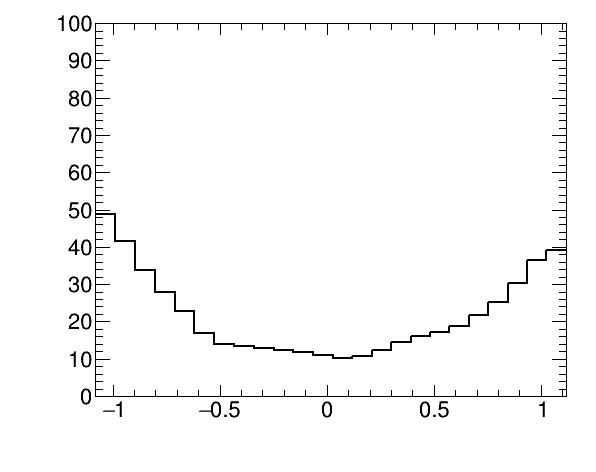

In [20]:
canvas = TCanvas("canvas","",600,500)
hcal_sigma.Draw()
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


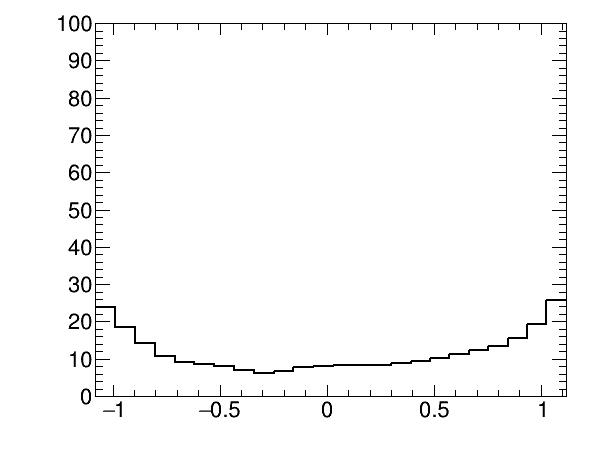

In [22]:
canvas = TCanvas("canvas","",600,500)
ihcal_sigma.Draw()
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2024/detdeta_plots/mc_variation_10-20.png has been created


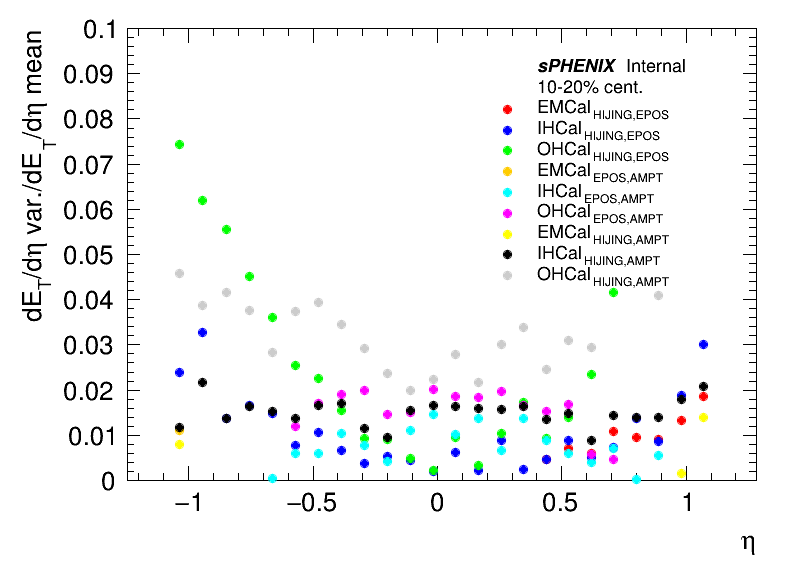

In [203]:
ehe = array('f', emcal_hijing_epos_perc)
ihe = array('f', ihcal_hijing_epos_perc)
ohe = array('f', ohcal_hijing_epos_perc)
eea = array('f', emcal_epos_ampt_perc)
iea = array('f', ihcal_epos_ampt_perc)
oea = array('f', ohcal_epos_ampt_perc)
eha = array('f', emcal_hijing_ampt_perc)
iha = array('f', ihcal_hijing_ampt_perc)
oha = array('f', ohcal_hijing_ampt_perc)
leg_tags = ['EMCal_{HIJING,EPOS}','IHCal_{HIJING,EPOS}','OHCal_{HIJING,EPOS}','EMCal_{EPOS,AMPT}','IHCal_{EPOS,AMPT}','OHCal_{EPOS,AMPT}','EMCal_{HIJING,AMPT}','IHCal_{HIJING,AMPT}','OHCal_{HIJING,AMPT}']

x = []
for i in range(1, 25):
    x.append(ihcal_detdeta_hijing.GetXaxis().GetBinCenter(i))
xarray = array('f', x)

arrays = [ehe, ihe, ohe, eea, iea, oea, eha, iha, oha]

# Create a canvas
canvas = ROOT.TCanvas("canvas", "Graphs", 800, 600)

# Create and plot TGraphs for each array
graphs = []
colors = [ROOT.kRed, ROOT.kBlue, ROOT.kGreen, ROOT.kOrange, ROOT.kCyan, ROOT.kMagenta, ROOT.kYellow, ROOT.kBlack, ROOT.kGray]
for i, arr in enumerate(arrays):
    graphs.append(ROOT.TGraph(len(xarray), xarray, arr))
    graphs[i].SetMarkerStyle(20)
    graphs[i].SetMarkerSize(1)
    graphs[i].SetMarkerColor(colors[i])
    graphs[i].GetYaxis().SetRangeUser(0,0.1)
    if i == 0:
        graphs[i].GetXaxis().SetTitle("#eta")
        graphs[i].GetYaxis().SetTitle("dE_{T}/d#eta var./dE_{T}/d#eta mean")
        graphs[i].Draw("AP")
    else:
        graphs[i].Draw("P,same")

# Set the legend
legend = ROOT.TLegend(0.6, 0.5, 0.9, 0.9)
legend.AddEntry("","#it{#bf{sPHENIX}} Internal","")
legend.AddEntry("",f"{cent}% cent.","")
legend.SetTextSize(0.035)
for i, graph in enumerate(graphs):
    legend.AddEntry(graph,leg_tags[i], "p")
legend.Draw()

# Draw the canvas
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/spring_2024/detdeta_plots/mc_variation_"+cent+".png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


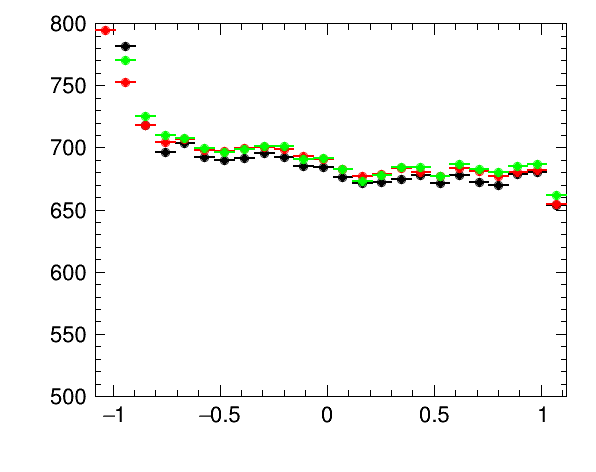

In [176]:
canvas = TCanvas("canvas","",600,500)
emcal_detdeta_epos.SetLineColor(2)
emcal_detdeta_ampt.SetLineColor(3)
emcal_detdeta_epos.SetMarkerColor(2)
emcal_detdeta_ampt.SetMarkerColor(3)
emcal_detdeta_hijing.GetYaxis().SetRangeUser(500,800)
emcal_detdeta_hijing.Draw()
emcal_detdeta_epos.Draw("same")
emcal_detdeta_ampt.Draw("same")
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


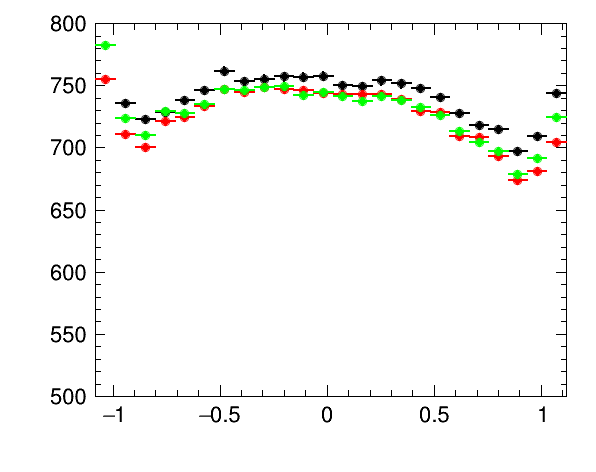

In [179]:
canvas = TCanvas("canvas","",600,500)
ihcal_detdeta_epos.SetLineColor(2)
ihcal_detdeta_ampt.SetLineColor(3)
ihcal_detdeta_epos.SetMarkerColor(2)
ihcal_detdeta_ampt.SetMarkerColor(3)
ihcal_detdeta_hijing.GetYaxis().SetRangeUser(500,800)
ihcal_detdeta_hijing.Draw()
ihcal_detdeta_epos.Draw("same")
ihcal_detdeta_ampt.Draw("same")
canvas.Draw()